In [1]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('Himachal_data.csv')

In [ ]:
data

,Year,Month,Rain,T_max,T_min,Himachal_Pradesh,HP_Tourism,HP_Weather,HP_Travel,Party & Holiday Supplies,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010.0,Jan,15.1893,17.1000,-1.1400,51,22,3,0,0,35,35,0,0,4,0,20,0,695702
1,NaN,Feb,89.2428,21.4200,0.4400,54,24,2,14,0,34,40,3,0,11,0,19,8,1035789
2,NaN,Mar,33.4067,28.3600,5.5000,58,31,1,11,0,51,40,0,0,21,0,28,6,1201482
3,NaN,Apr,30.4483,33.5800,10.3400,77,49,7,15,0,66,65,6,3,32,0,34,0,1617416
4,NaN,May,55.3015,35.5500,12.3600,100,56,5,0,0,85,86,4,0,48,4,50,6,1424654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,Aug,218.1850,31.8018,18.5823,58,2,40,4,<1,24,35,1,1,11,<1,11,1,815973
152,NaN,Sep,103.0980,30.9271,14.8252,58,2,32,4,0,24,38,1,1,11,<1,13,1,1015151
153,NaN,Oct,49.1803,29.1017,8.8543,57,2,29,4,<1,22,36,1,1,14,1,12,1,1231105
154,NaN,Nov,22.8696,23.7106,4.3439,55,2,24,5,<1,22,36,1,1,11,<1,12,1,1141065


In [ ]:
# Assuming the first Year value is correct, fill missing Year values
data['Year'].fillna(method='ffill', inplace=True)

# Combine Year and Month into a single Date column
data['Date'] = pd.to_datetime(data['Year'].astype(int).astype(str) + '-' + data['Month'], format='%Y-%b')

# Drop the Year and Month columns
data = data.drop(['Year', 'Month'], axis=1)

In [ ]:
# Check for missing data
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

# If there is missing data, you can handle it by filling with a specific value or using interpolation methods.
# For example, to fill missing values with the mean of the column:
data.fillna(data.mean(), inplace=True)


Missing Data:
 Rain                        0
T_max                       0
T_min                       0
Himachal_Pradesh            0
HP_Tourism                  0
HP_Weather                  0
HP_Travel                   0
Party & Holiday Supplies    0
Geographic Reference        0
Travel                      0
Hotels & Accommodations     0
Air Travel                  0
Bus & Rail                  0
Car & Taxi                  0
Tourist Destinations        0
Travel Agencies             0
Tourist Arrivals            0
Date                        0
dtype: int64


<ipython-input-19-86af53589cac>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
<ipython-input-19-86af53589cac>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
# Detect outliers using z-score
from scipy import stats

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Compute the z-scores for numerical columns (excluding the 'Date' column)
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Create a mask of rows where any numerical column has a z-score greater than the threshold
outliers_mask = (z_scores > threshold).any(axis=1)

# Identify the rows with outliers
outliers_data = data[outliers_mask]

# You can choose to remove the outliers or handle them differently (e.g., impute with median)
# Here, we remove the outliers
# data = data[~outliers_mask]
outliers_data
for index, row in data.iterrows():

  if index > 13 and index < 144:
    data["Tourist Arrivals"][index] = (data["Tourist Arrivals"][index - 12] + data["Tourist Arrivals"][index + 12])/2
  elif index < 13:
    data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index + 12]
  else:
    data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index - 12]

<ipython-input-20-1f8548c540b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index + 12]
<ipython-input-20-1f8548c540b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index - 12]
<ipython-input-20-1f8548c540b6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tourist Arrivals"][index] = (data["Tourist Ar

In [ ]:
data

,Rain,T_max,T_min,Himachal_Pradesh,HP_Tourism,HP_Weather,HP_Travel,Party & Holiday Supplies,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals,Date
0,15.1893,17.1000,-1.1400,51,22,3,0,0,35,35,0,0,4,0,20,0,7.573770e+05,2010-01-01
1,89.2428,21.4200,0.4400,54,24,2,14,0,34,40,3,0,11,0,19,8,8.693840e+05,2010-02-01
2,33.4067,28.3600,5.5000,58,31,1,11,0,51,40,0,0,21,0,28,6,1.428569e+06,2010-03-01
3,30.4483,33.5800,10.3400,77,49,7,15,0,66,65,6,3,32,0,34,0,1.903137e+06,2010-04-01
4,55.3015,35.5500,12.3600,100,56,5,0,0,85,86,4,0,48,4,50,6,1.592719e+06,2010-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,218.1850,31.8018,18.5823,58,2,40,4,<1,24,35,1,1,11,<1,11,1,6.552576e+05,2022-08-01
152,103.0980,30.9271,14.8252,58,2,32,4,0,24,38,1,1,11,<1,13,1,8.019736e+05,2022-09-01
153,49.1803,29.1017,8.8543,57,2,29,4,<1,22,36,1,1,14,1,12,1,9.996620e+05,2022-10-01
154,22.8696,23.7106,4.3439,55,2,24,5,<1,22,36,1,1,11,<1,12,1,8.833165e+05,2022-11-01


In [ ]:
# Detect outliers using z-score
from scipy import stats

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Compute the z-scores for numerical columns (excluding the 'Date' column)
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Create a mask of rows where any numerical column has a z-score greater than the threshold
outliers_mask = (z_scores > threshold).any(axis=1)

# Identify the rows with outliers
outliers_data = data[outliers_mask]

# You can choose to remove the outliers or handle them differently (e.g., impute with median)
# Here, we remove the outliers
# data = data[~outliers_mask]
outliers_data

,Rain,T_max,T_min,Himachal_Pradesh,HP_Tourism,HP_Weather,HP_Travel,Party & Holiday Supplies,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals,Date
1,89.2428,21.4200,0.4400,54,24,2,14,0,34,40,3,0,11,0,19,8,8.693840e+05,2010-02-01
3,30.4483,33.5800,10.3400,77,49,7,15,0,66,65,6,3,32,0,34,0,1.903137e+06,2010-04-01
4,55.3015,35.5500,12.3600,100,56,5,0,0,85,86,4,0,48,4,50,6,1.592719e+06,2010-05-01
5,191.1265,35.8900,13.3800,73,54,3,0,0,73,62,0,0,41,0,31,0,1.808553e+06,2010-06-01
8,192.3550,28.7600,12.5500,57,21,5,16,0,33,39,3,3,16,7,13,0,1.196179e+06,2010-09-01
9,25.4012,27.7900,7.0000,52,19,2,15,0,26,35,3,0,15,0,21,0,1.484130e+06,2010-10-01
120,161.9257,14.5102,-1.5670,54,2,86,3,0,21,37,1,1,10,<1,12,1,7.565915e+05,2020-01-01
137,70.9726,34.8843,13.8846,78,5,54,22,0,29,51,2,1,16,0,17,1,1.415364e+06,2021-06-01
144,143.0970,15.9545,0.1126,68,2,100,6,0,25,48,1,1,10,<1,13,1,7.627778e+05,2022-01-01
155,8.0327,20.5520,0.0319,99,2,29,4,0,29,50,1,1,12,<1,15,1,1.041405e+06,2022-12-01


In [ ]:
data['Tourist Arrivals']

0      7.573770e+05
1      8.693840e+05
2      1.428569e+06
3      1.903137e+06
4      1.592719e+06
           ...     
151    6.552576e+05
152    8.019736e+05
153    9.996620e+05
154    8.833165e+05
155    1.041405e+06
Name: Tourist Arrivals, Length: 156, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate the target variable (Tourist Arrivals)
target = data['Tourist Arrivals']
data = data.drop(['Tourist Arrivals'], axis=1)

# Select numerical columns for normalization
numerical_cols = data.select_dtypes(include=np.number).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Add the Target column back to the dataset
data['Tourist Arrivals'] = target


In [ ]:
data

,Rain,T_max,T_min,Himachal_Pradesh,HP_Tourism,HP_Weather,HP_Travel,Party & Holiday Supplies,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Date,Tourist Arrivals
0,-0.938689,-1.652862,-1.389167,-0.538030,1.532812,-0.758869,-1.488372,0,1.212989,0.130224,0,0,-1.590929,0,0.987398,0,2010-01-01,7.573770e+05
1,-0.000359,-0.939998,-1.152717,-0.271295,1.754014,-0.812557,3.013850,0,1.114176,0.625708,3,0,-0.222981,0,0.816249,8,2010-02-01,8.693840e+05
2,-0.707857,0.205206,-0.395478,0.084352,2.528219,-0.866246,2.049088,0,2.793992,0.625708,0,0,1.731232,0,2.356590,6,2010-03-01,1.428569e+06
3,-0.745343,1.066583,0.328838,1.773676,4.519031,-0.544114,3.335437,0,4.276182,3.103133,6,3,3.880865,0,3.383483,0,2010-04-01,1.903137e+06
4,-0.430428,1.391663,0.631135,3.818646,5.293236,-0.651491,-1.488372,0,6.153623,5.184169,4,0,7.007605,4,6.121867,6,2010-05-01,1.592719e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.633463,0.773154,1.562315,0.084352,-0.679202,1.227612,-0.202023,<1,0.126050,0.130224,1,1,-0.222981,<1,-0.552943,1,2022-08-01,6.552576e+05
152,0.175199,0.628815,1.000057,0.084352,-0.679202,0.798103,-0.202023,0,0.126050,0.427514,1,1,-0.222981,<1,-0.210645,1,2022-09-01,8.019736e+05
153,-0.507990,0.327597,0.106500,-0.004560,-0.679202,0.637037,-0.202023,<1,-0.071576,0.229321,1,1,0.363283,1,-0.381794,1,2022-10-01,9.996620e+05
154,-0.841372,-0.562015,-0.568490,-0.182383,-0.679202,0.368593,0.119565,<1,-0.071576,0.229321,1,1,-0.222981,<1,-0.381794,1,2022-11-01,8.833165e+05


In [ ]:
# import pandas as pd

# # Assuming 'data' is your DataFrame
# categorical_columns = data.select_dtypes(include=['object']).columns

# if len(categorical_columns) > 0:
#     print("Categorical columns found:")
#     for column in categorical_columns:
#         print(column)
# else:
#     print("No categorical columns found.")


In [ ]:
# # Assuming 'data' is your DataFrame

# # Check if categorical columns are found
# categorical_columns = data.select_dtypes(include=['object']).columns

# if len(categorical_columns) > 0:
#     print("Categorical columns found:")
#     for column in categorical_columns:
#         print(column)

#     # Perform one-hot encoding for categorical columns
#     data = pd.get_dummies(data, columns=categorical_columns)

#     print("One-hot encoding completed.")
# else:
#     print("No categorical columns found.")

# # Now, you can proceed with training your Linear Regression model



In [ ]:
data = data.replace(to_replace="<1",
           value=0)

In [ ]:
data

,Rain,T_max,T_min,Himachal_Pradesh,HP_Tourism,HP_Weather,HP_Travel,Party & Holiday Supplies,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Date,Tourist Arrivals
0,-0.938689,-1.652862,-1.389167,-0.538030,1.532812,-0.758869,-1.488372,0,1.212989,0.130224,0,0,-1.590929,0,0.987398,0,2010-01-01,7.573770e+05
1,-0.000359,-0.939998,-1.152717,-0.271295,1.754014,-0.812557,3.013850,0,1.114176,0.625708,3,0,-0.222981,0,0.816249,8,2010-02-01,8.693840e+05
2,-0.707857,0.205206,-0.395478,0.084352,2.528219,-0.866246,2.049088,0,2.793992,0.625708,0,0,1.731232,0,2.356590,6,2010-03-01,1.428569e+06
3,-0.745343,1.066583,0.328838,1.773676,4.519031,-0.544114,3.335437,0,4.276182,3.103133,6,3,3.880865,0,3.383483,0,2010-04-01,1.903137e+06
4,-0.430428,1.391663,0.631135,3.818646,5.293236,-0.651491,-1.488372,0,6.153623,5.184169,4,0,7.007605,4,6.121867,6,2010-05-01,1.592719e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.633463,0.773154,1.562315,0.084352,-0.679202,1.227612,-0.202023,0,0.126050,0.130224,1,1,-0.222981,0,-0.552943,1,2022-08-01,6.552576e+05
152,0.175199,0.628815,1.000057,0.084352,-0.679202,0.798103,-0.202023,0,0.126050,0.427514,1,1,-0.222981,0,-0.210645,1,2022-09-01,8.019736e+05
153,-0.507990,0.327597,0.106500,-0.004560,-0.679202,0.637037,-0.202023,0,-0.071576,0.229321,1,1,0.363283,1,-0.381794,1,2022-10-01,9.996620e+05
154,-0.841372,-0.562015,-0.568490,-0.182383,-0.679202,0.368593,0.119565,0,-0.071576,0.229321,1,1,-0.222981,0,-0.381794,1,2022-11-01,8.833165e+05


In [ ]:
data["Date"]

0     2010-01-01
1     2010-02-01
2     2010-03-01
3     2010-04-01
4     2010-05-01
         ...    
151   2022-08-01
152   2022-09-01
153   2022-10-01
154   2022-11-01
155   2022-12-01
Name: Date, Length: 156, dtype: datetime64[ns]

In [ ]:
y = data["Date"]
# y1 = y.to_numpy()
data = data.drop(["Date"], axis = 1)
# # data = data.insert(0, "Date", y1)
data
print(data)

         Rain     T_max     T_min  Himachal_Pradesh  HP_Tourism  HP_Weather  \
0   -0.938689 -1.652862 -1.389167         -0.538030    1.532812   -0.758869   
1   -0.000359 -0.939998 -1.152717         -0.271295    1.754014   -0.812557   
2   -0.707857  0.205206 -0.395478          0.084352    2.528219   -0.866246   
3   -0.745343  1.066583  0.328838          1.773676    4.519031   -0.544114   
4   -0.430428  1.391663  0.631135          3.818646    5.293236   -0.651491   
..        ...       ...       ...               ...         ...         ...   
151  1.633463  0.773154  1.562315          0.084352   -0.679202    1.227612   
152  0.175199  0.628815  1.000057          0.084352   -0.679202    0.798103   
153 -0.507990  0.327597  0.106500         -0.004560   -0.679202    0.637037   
154 -0.841372 -0.562015 -0.568490         -0.182383   -0.679202    0.368593   
155 -1.029370 -1.083231 -1.213790          3.729735   -0.679202    0.637037   

     HP_Travel Party & Holiday Supplies  Geographic

In [ ]:
data1 = data
data1

,Date,Rain,T_max,T_min,Himachal_Pradesh,HP_Tourism,HP_Weather,HP_Travel,Party & Holiday Supplies,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010-01-01,-0.938689,-1.652862,-1.389167,-0.538030,1.532812,-0.758869,-1.488372,0,1.212989,0.130224,0,0,-1.590929,0,0.987398,0,7.573770e+05
1,2010-02-01,-0.000359,-0.939998,-1.152717,-0.271295,1.754014,-0.812557,3.013850,0,1.114176,0.625708,3,0,-0.222981,0,0.816249,8,8.693840e+05
2,2010-03-01,-0.707857,0.205206,-0.395478,0.084352,2.528219,-0.866246,2.049088,0,2.793992,0.625708,0,0,1.731232,0,2.356590,6,1.428569e+06
3,2010-04-01,-0.745343,1.066583,0.328838,1.773676,4.519031,-0.544114,3.335437,0,4.276182,3.103133,6,3,3.880865,0,3.383483,0,1.903137e+06
4,2010-05-01,-0.430428,1.391663,0.631135,3.818646,5.293236,-0.651491,-1.488372,0,6.153623,5.184169,4,0,7.007605,4,6.121867,6,1.592719e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,1.633463,0.773154,1.562315,0.084352,-0.679202,1.227612,-0.202023,0,0.126050,0.130224,1,1,-0.222981,0,-0.552943,1,6.552576e+05
152,2022-09-01,0.175199,0.628815,1.000057,0.084352,-0.679202,0.798103,-0.202023,0,0.126050,0.427514,1,1,-0.222981,0,-0.210645,1,8.019736e+05
153,2022-10-01,-0.507990,0.327597,0.106500,-0.004560,-0.679202,0.637037,-0.202023,0,-0.071576,0.229321,1,1,0.363283,1,-0.381794,1,9.996620e+05
154,2022-11-01,-0.841372,-0.562015,-0.568490,-0.182383,-0.679202,0.368593,0.119565,0,-0.071576,0.229321,1,1,-0.222981,0,-0.381794,1,8.833165e+05


In [ ]:
print(data1)

         Rain     T_max     T_min  Himachal_Pradesh  HP_Tourism  HP_Weather  \
0   -0.938689 -1.652862 -1.389167         -0.538030    1.532812   -0.758869   
1   -0.000359 -0.939998 -1.152717         -0.271295    1.754014   -0.812557   
2   -0.707857  0.205206 -0.395478          0.084352    2.528219   -0.866246   
3   -0.745343  1.066583  0.328838          1.773676    4.519031   -0.544114   
4   -0.430428  1.391663  0.631135          3.818646    5.293236   -0.651491   
..        ...       ...       ...               ...         ...         ...   
151  1.633463  0.773154  1.562315          0.084352   -0.679202    1.227612   
152  0.175199  0.628815  1.000057          0.084352   -0.679202    0.798103   
153 -0.507990  0.327597  0.106500         -0.004560   -0.679202    0.637037   
154 -0.841372 -0.562015 -0.568490         -0.182383   -0.679202    0.368593   
155 -1.029370 -1.083231 -1.213790          3.729735   -0.679202    0.637037   

     HP_Travel Party & Holiday Supplies  Geographic

In [ ]:
preprocessed_data = data1

In [ ]:
preprocessed_data

,Date,Rain,T_max,T_min,Himachal_Pradesh,HP_Tourism,HP_Weather,HP_Travel,Party & Holiday Supplies,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010-01-01,-0.938689,-1.652862,-1.389167,-0.538030,1.532812,-0.758869,-1.488372,0,1.212989,0.130224,0,0,-1.590929,0,0.987398,0,7.573770e+05
1,2010-02-01,-0.000359,-0.939998,-1.152717,-0.271295,1.754014,-0.812557,3.013850,0,1.114176,0.625708,3,0,-0.222981,0,0.816249,8,8.693840e+05
2,2010-03-01,-0.707857,0.205206,-0.395478,0.084352,2.528219,-0.866246,2.049088,0,2.793992,0.625708,0,0,1.731232,0,2.356590,6,1.428569e+06
3,2010-04-01,-0.745343,1.066583,0.328838,1.773676,4.519031,-0.544114,3.335437,0,4.276182,3.103133,6,3,3.880865,0,3.383483,0,1.903137e+06
4,2010-05-01,-0.430428,1.391663,0.631135,3.818646,5.293236,-0.651491,-1.488372,0,6.153623,5.184169,4,0,7.007605,4,6.121867,6,1.592719e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,1.633463,0.773154,1.562315,0.084352,-0.679202,1.227612,-0.202023,0,0.126050,0.130224,1,1,-0.222981,0,-0.552943,1,6.552576e+05
152,2022-09-01,0.175199,0.628815,1.000057,0.084352,-0.679202,0.798103,-0.202023,0,0.126050,0.427514,1,1,-0.222981,0,-0.210645,1,8.019736e+05
153,2022-10-01,-0.507990,0.327597,0.106500,-0.004560,-0.679202,0.637037,-0.202023,0,-0.071576,0.229321,1,1,0.363283,1,-0.381794,1,9.996620e+05
154,2022-11-01,-0.841372,-0.562015,-0.568490,-0.182383,-0.679202,0.368593,0.119565,0,-0.071576,0.229321,1,1,-0.222981,0,-0.381794,1,8.833165e+05


In [ ]:
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' contains your preprocessed dataset

# Split the data into features (X) and the target variable (y)
X = data.drop(['Tourist Arrivals', 'Date'], axis=1)
y = data['Tourist Arrivals']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 57801546866.67452
R-squared (R2) Score: 0.6013931581350191


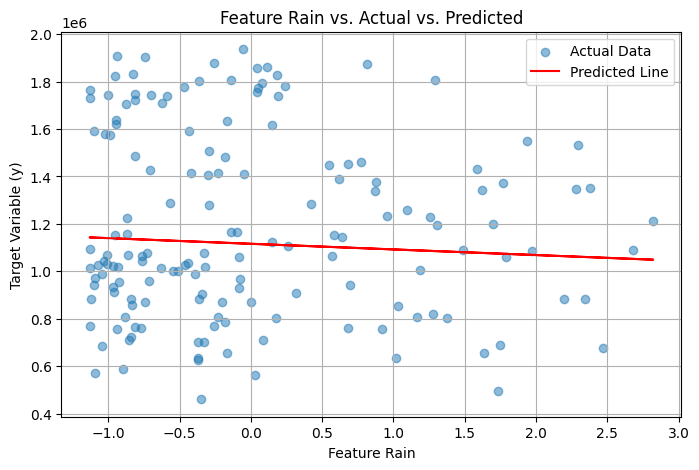

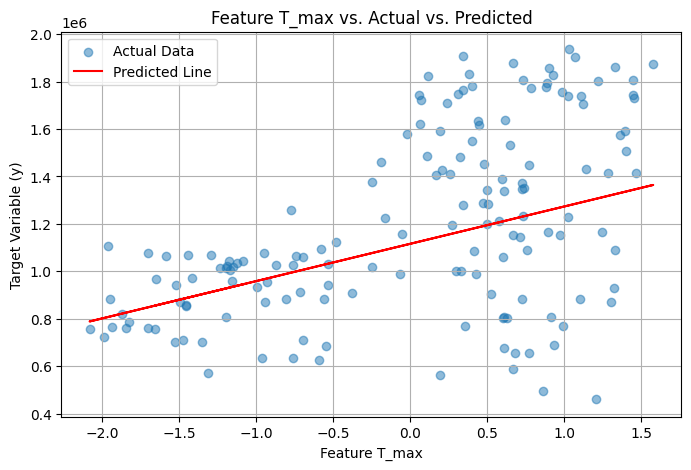

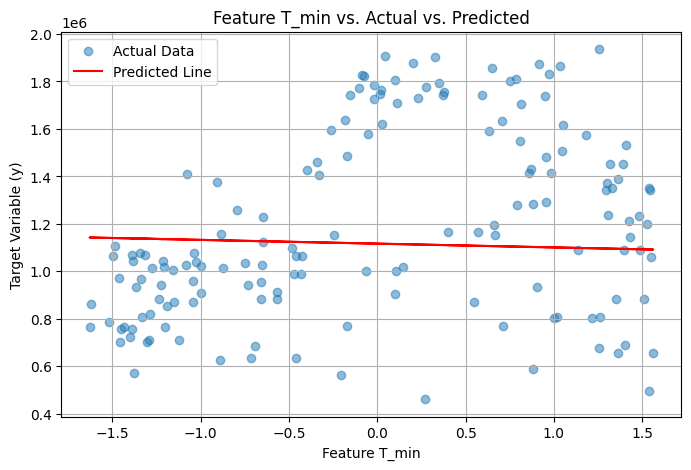

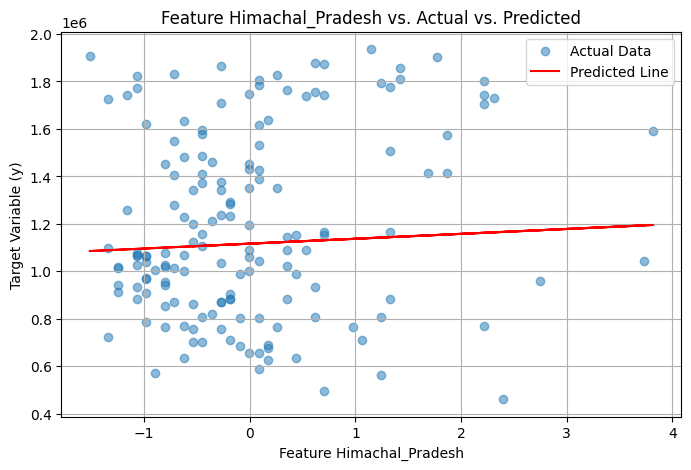

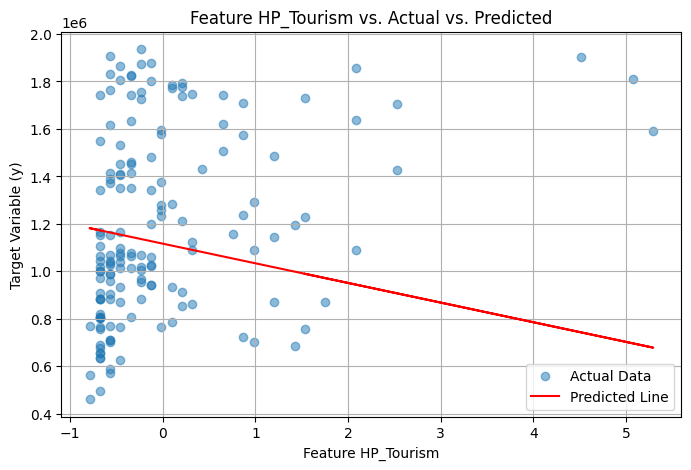

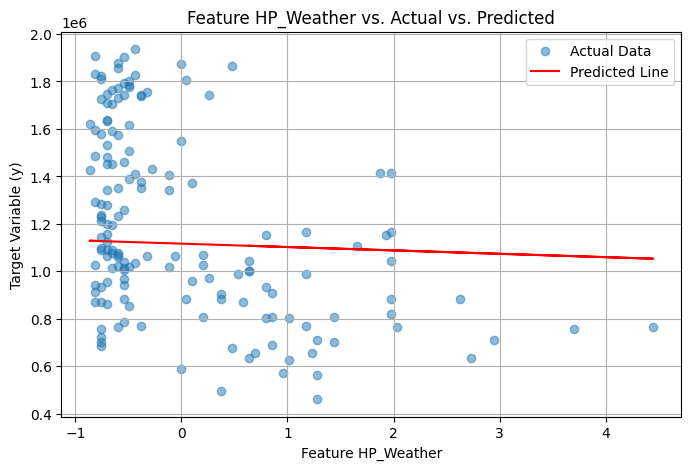

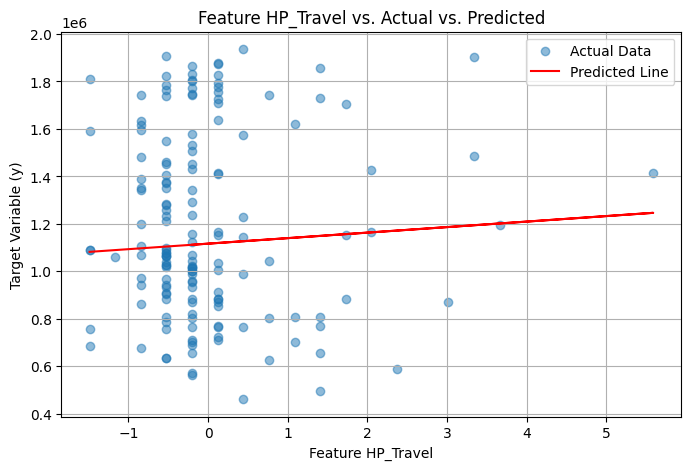

TypeError: ignored

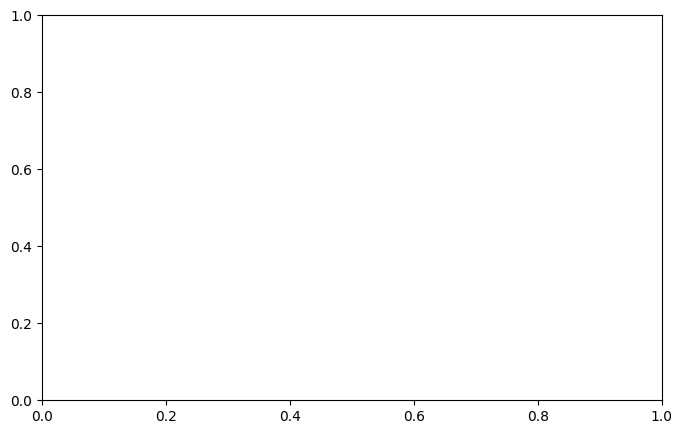

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'X' contains your feature data, 'y' contains your target variable
# 'y_pred' contains the predicted values from your linear regression model

# Get the number of features in X
num_features = X.shape[1]

# Create separate scatterplots for each feature against the target variable
for i in range(num_features):
    plt.figure(figsize=(8, 5))
    plt.scatter(X.iloc[:, i], y, alpha=0.5, label="Actual Data")

    # Get the corresponding predicted values for this feature
    y_pred_feature = X.iloc[:, i] * model.coef_[i] + model.intercept_

    plt.plot(X.iloc[:, i], y_pred_feature, color='red', label="Predicted Line")

    plt.xlabel(f"Feature {X.columns[i]}")
    plt.ylabel("Target Variable (y)")
    plt.title(f"Feature {X.columns[i]} vs. Actual vs. Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()
